In [98]:
# Necessary libraries for data manipulation, model building, and visualization are imported and the Dataset is loaded.

In [99]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df=pd.read_csv('ecommerce_purchase_data.csv')


In [100]:
# Data Preprocessing
# Missing values are handled using the forward fill method.
# Gender and ProductCategory are encoded using LabelEncoder.
# LastPurchaseDate is converted to the number of days from the current date.
# Features are standardized using StandardScaler for better performance of Isolation Forest.

In [101]:
# Handle missing values (if any)
# Forward fill method is used to fill any missing values
numeric_columns=df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns]=df[numeric_columns].fillna(method='ffill')

# Encode categorical features
# Label Encoding 'Gender' and 'ProductCategory'
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['ProductCategory']=le.fit_transform(df['ProductCategory'])

# Feature engineering - Convert 'LastPurchaseDate' to numerical value
# Converting date to number of days from now
df['LastPurchaseDate'] = pd.to_datetime(df['LastPurchaseDate'], format='%d-%m-%Y', utc=True)
df['LastPurchaseDate'] = (pd.to_datetime('now', utc=True) - df['LastPurchaseDate']).dt.days

#df['LastPurchaseDate'] = (pd.to_datetime('now', utc=True) - pd.to_datetime(df['LastPurchaseDate'], utc=True)).dt.days

# Standardize the features
# StandardScaler is used to normalize the features for better performance of Isolation Forest
features=['Age', 'Gender', 'AnnualIncome', 'PurchaseAmount', 'PurchaseFrequency', 
             'LastPurchaseDate', 'ProductCategory', 'LoyaltyProgramMember', 'CustomerRating']
scaler=StandardScaler()
if df[features].isnull().values.any():
    df[features] = df[features].fillna(0)
df_scaled=pd.DataFrame(scaler.fit_transform(df))

In [102]:
# Isolation Forest model is initialized with 5% contamination.
# Outliers are labeled as 'Outlier' and inliers as 'Inlier'.
# Display the count of outliers and inliers.

In [103]:
# Initialize the Isolation Forest model
# Isolation Forest model is used to detect outliers
iso_forest=IsolationForest(contamination=0.05, random_state=42)
df['outliers']=iso_forest.fit_predict(df_scaled)

# Mark the outliers
# Labeling outliers as 'Outlier' and inliers as 'Inlier'
df['outliers']=df['outliers'].apply(lambda x: 'Outlier' if x == -1 else 'Inlier')

# Count of outliers
# Displaying the count of outliers and inliers
print(df['outliers'].value_counts())


Inlier     2850
Outlier     150
Name: outliers, dtype: int64


In [104]:
# Dataframe is split into outliers and inliers.
# Summary statistics for outliers and inliers are displayed.

In [105]:
# Analyze the Characteristics of Outliers
# Splitting the dataframe into outliers and inliers
outliers=df[df['outliers']=='Outlier']
inliers=df[df['outliers']=='Inlier']

# Summary statistics for outliers
print("Outliers Summary:")
print(outliers.describe())

# Summary statistics for inliers
print("\nInliers Summary:")
print(inliers.describe())


Outliers Summary:
        CustomerID         Age      Gender   AnnualIncome  PurchaseAmount  \
count   150.000000  150.000000  150.000000     150.000000      150.000000   
mean   1355.333333   42.520000    1.173333   70336.546667      213.074213   
std    1278.145834   19.004669    1.053894   33047.698464      180.922046   
min       1.000000   18.000000    0.000000   20074.000000        5.310621   
25%     127.250000   22.000000    0.000000   37627.000000       36.328338   
50%     583.000000   41.000000    1.000000   70873.500000      153.265062   
75%    2817.000000   62.000000    2.000000  103114.250000      401.050506   
max    2995.000000   69.000000    3.000000  119708.000000      499.661553   

       PurchaseFrequency  LastPurchaseDate  ProductCategory  \
count         150.000000        150.000000       150.000000   
mean           22.720000       -737.000000         1.680000   
std            17.105327       1275.415816         1.742944   
min             1.000000      -2390.

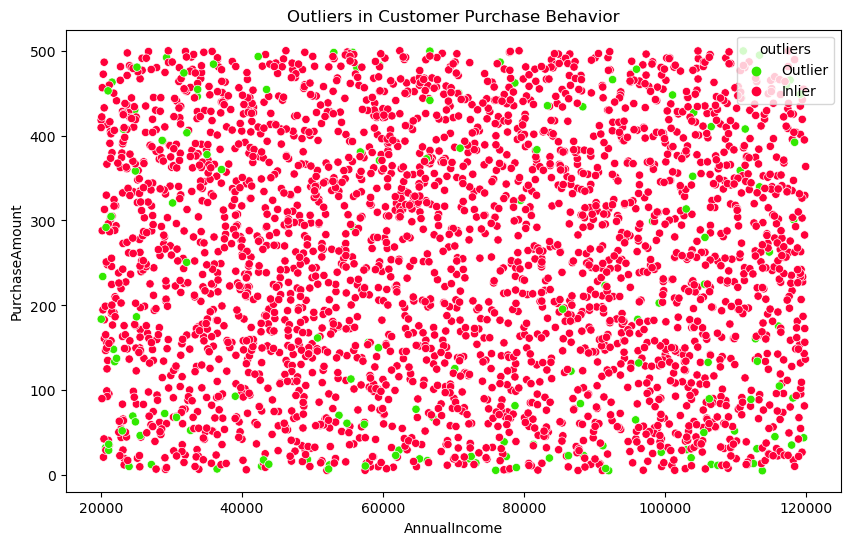

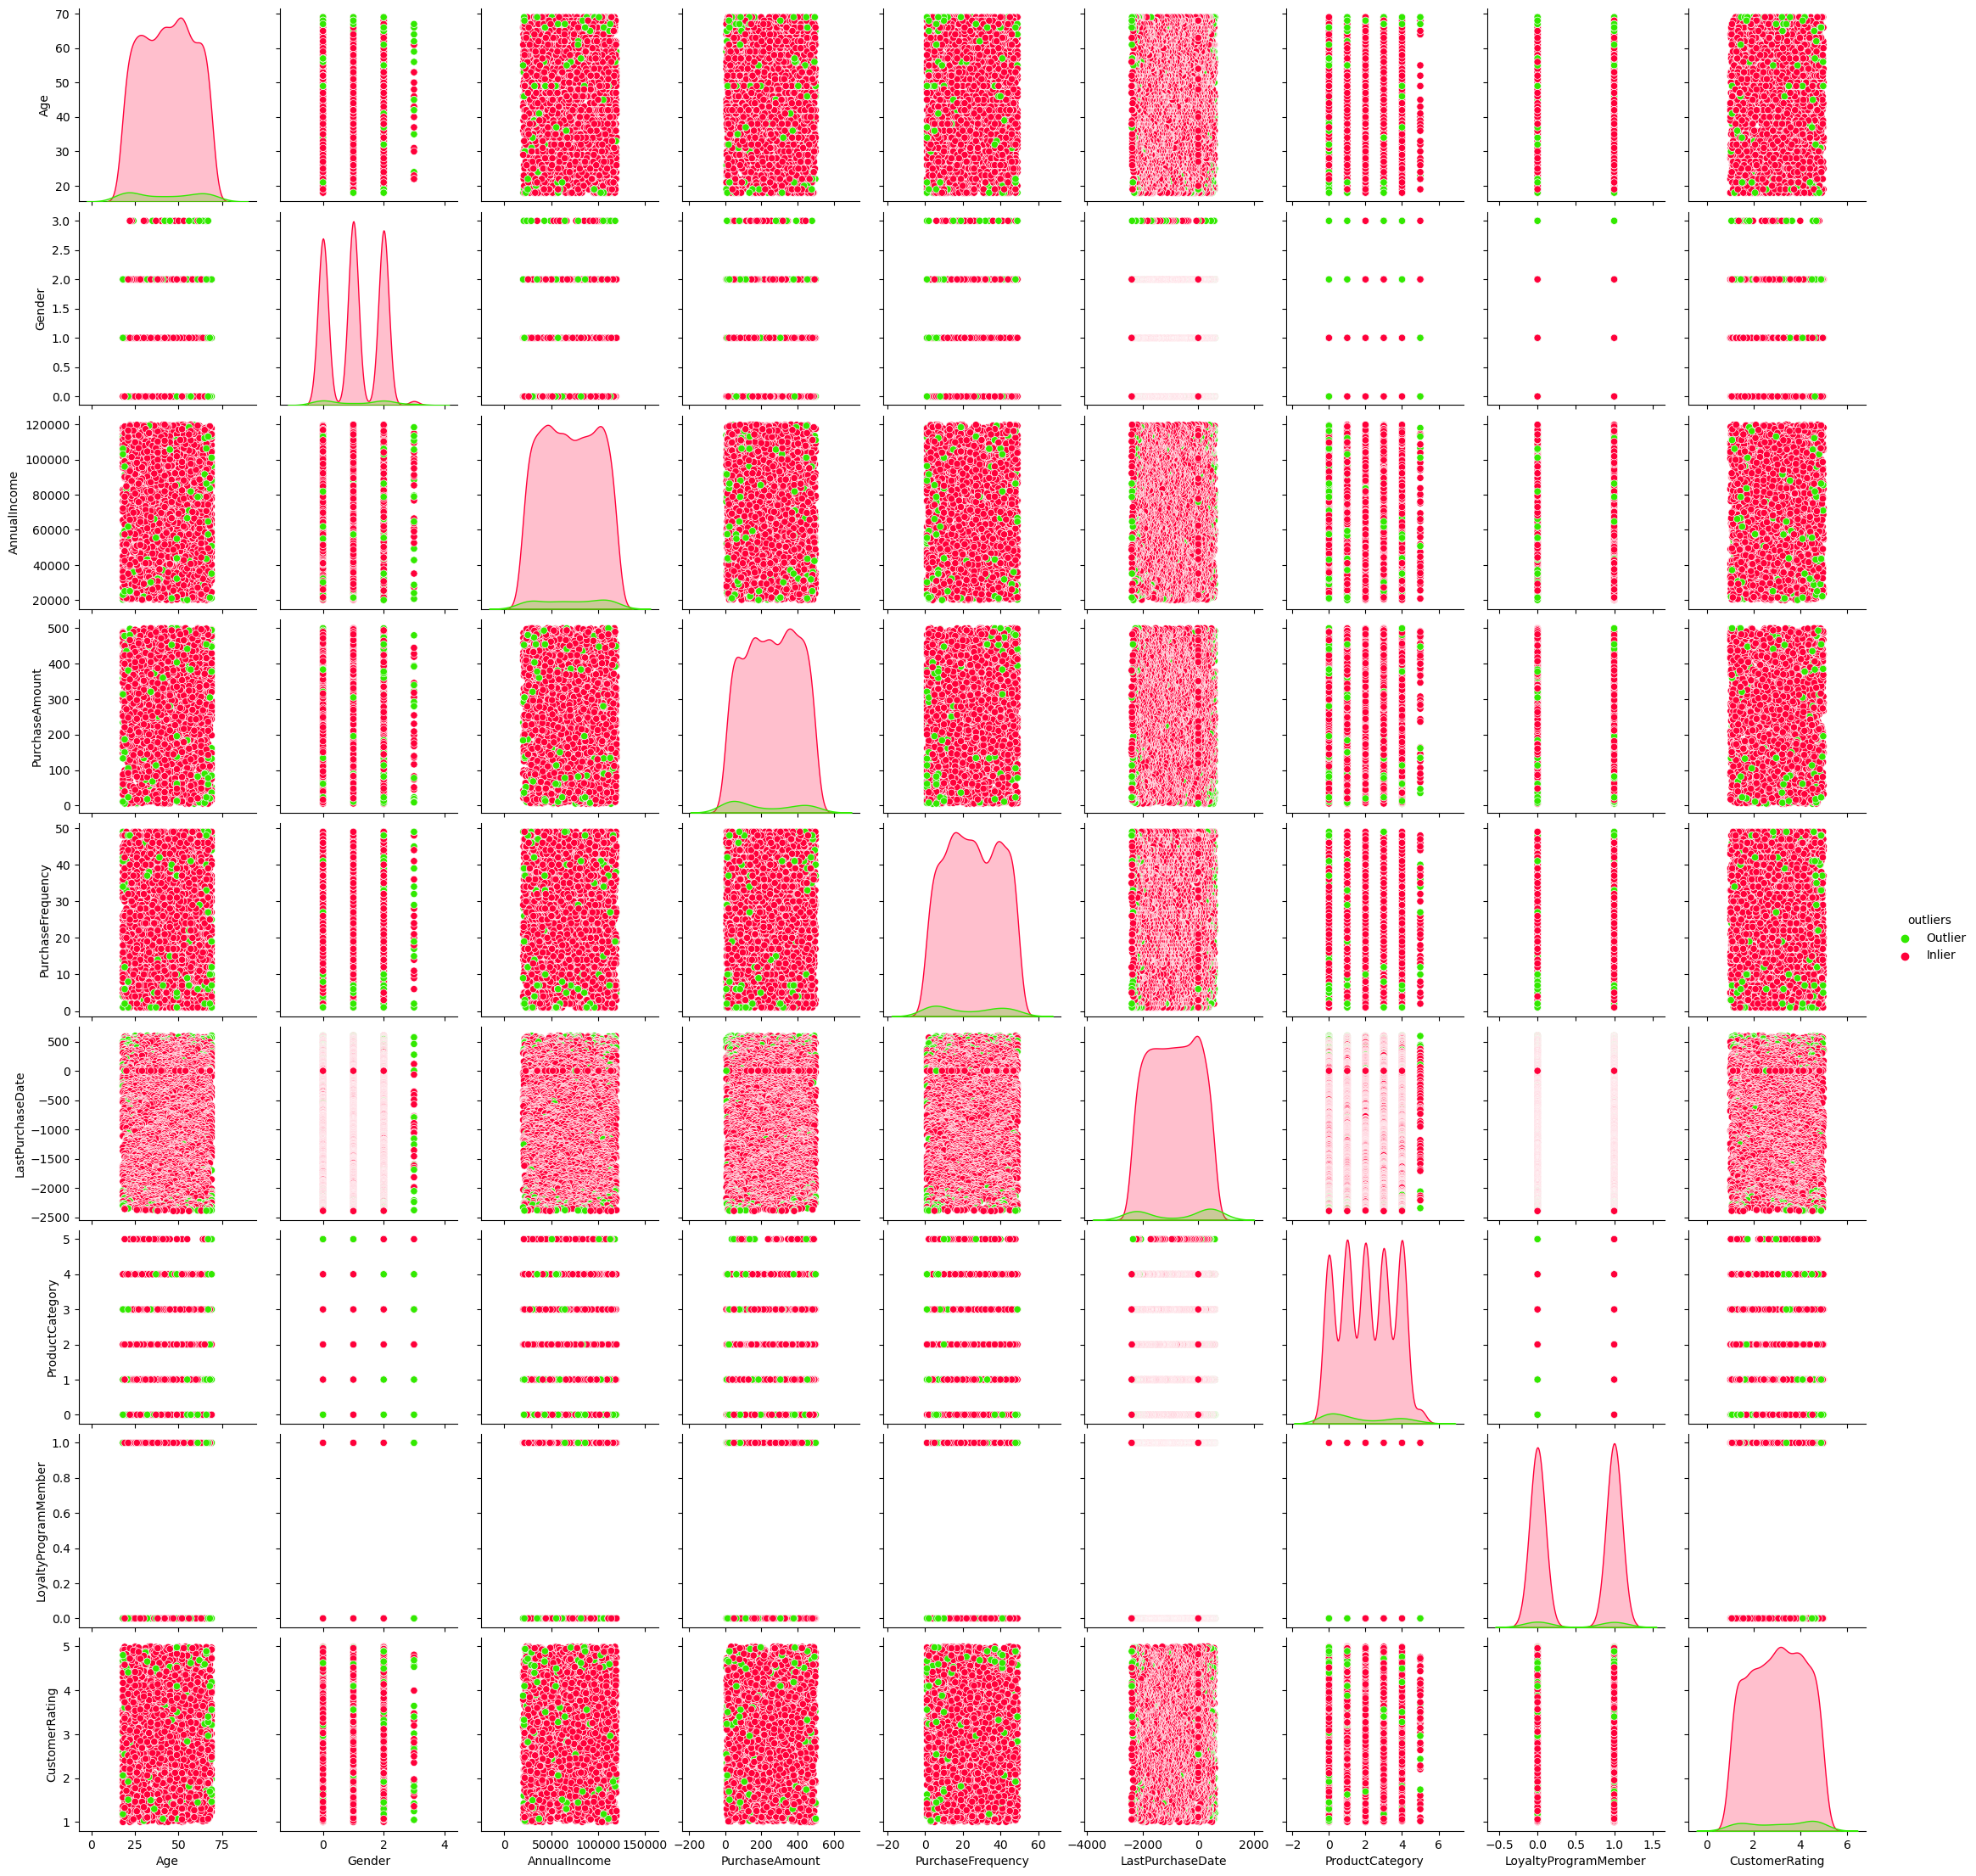

In [106]:
# Visualize the Outliers
# Scatter plot of Annual Income vs Purchase Amount with outliers highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AnnualIncome', y='PurchaseAmount', hue='outliers', palette='prism')
plt.title('Outliers in Customer Purchase Behavior')
plt.show()

# Pair plot for visualizing relationships between features and highlighting outliers
sns.pairplot(df, hue='outliers', vars=features, palette='prism')
plt.show()

In [107]:
# A box plot can help visualize the distribution of annual income for both inliers and outliers, highlighting any significant differences.
# A heatmap of the correlation matrix can help identify relationships between different features in the dataset, providing insights into how features are interrelated and how they might influence the identification of outliers.

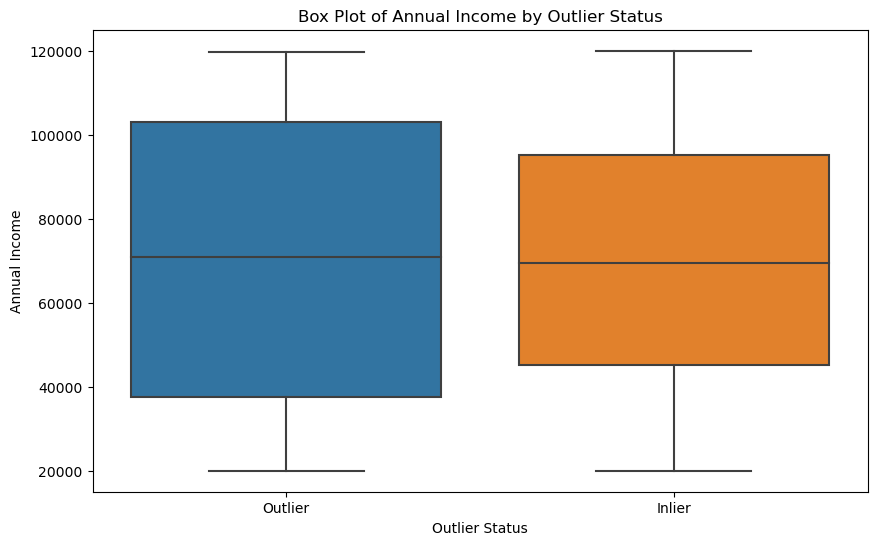

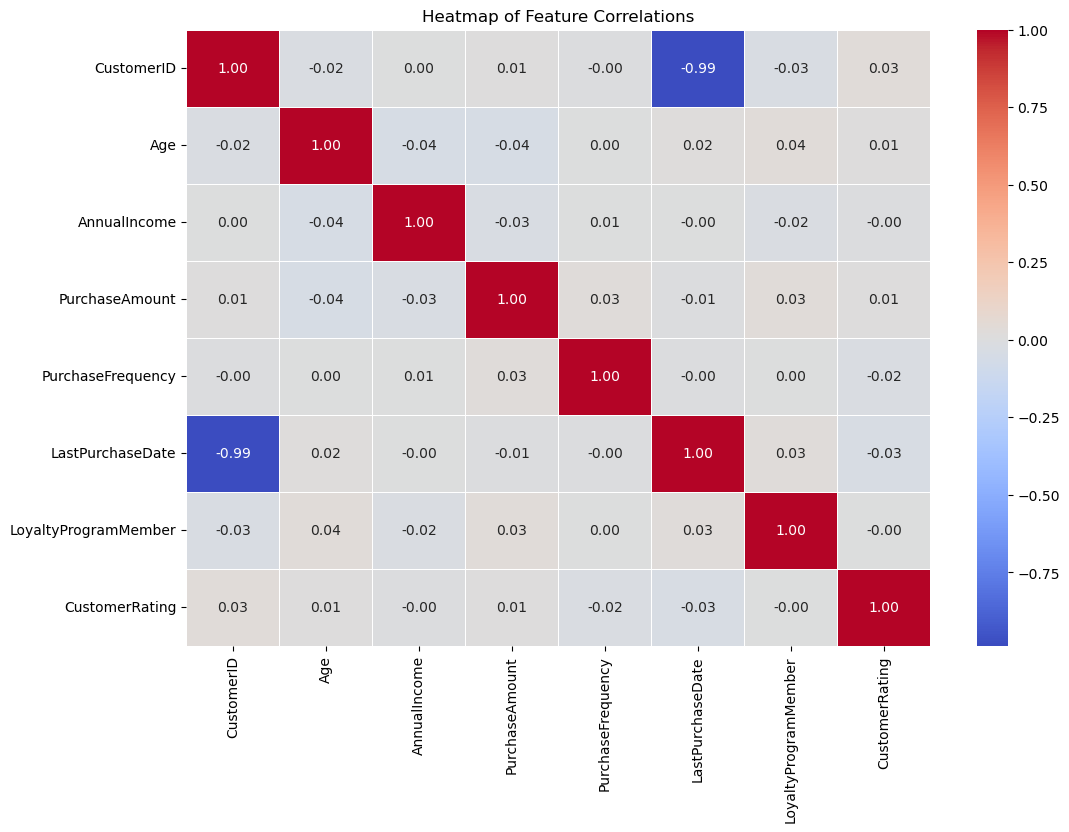

In [108]:
# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='outliers', y='AnnualIncome', data=df)
plt.title('Box Plot of Annual Income by Outlier Status')
plt.xlabel('Outlier Status')
plt.ylabel('Annual Income')
plt.show()

# Plot the heatmap
numeric_columns=df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix=df[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

In [109]:
# Business Insights

# Summary of Findings:

# High Purchase Amount Outliers: Customers with extremely high purchase amounts and frequencies were detected as outliers. These could be bulk buyers or fraudulent activities.
# Low Annual Income Outliers: Some outliers have very low annual income but high purchase amounts, indicating potential financial risk or fraudulent activities.
# Product Category and Loyalty Program: Outliers are distributed across different product categories and loyalty program statuses, indicating no strong correlation with these features.

# Business Recommendations:

# Fraud Detection: Investigate customers with unusually high purchase amounts and frequencies for potential fraud.
# Targeted Marketing: For genuine outliers with high purchases, consider them for exclusive offers or loyalty programs.
# Risk Management: Monitor customers with high purchases and low incomes to mitigate financial risk.